________________________
The mean amount of black vertices =  13.414815851841482


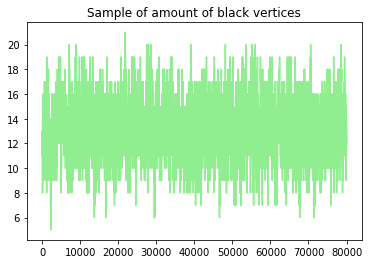

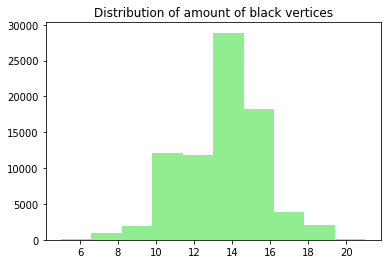

Ttest_indResult(statistic=1.0225936184324032, pvalue=0.3065217083474604)

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

def get_init_conf(size, steps):
    
    start = np.zeros(shape = (size, size))

    for i in range(steps):
        x = np.random.randint(size)
        y = np.random.randint(0, size)
        coin = np.random.randint(0, 2)
        
        if (coin):
            change = 1
            if (x + 1 < size):
                if (start[x + 1, y] == 1):
                    change = 0
                    
            if ((x >= 1) and (change)):
                if (start[x - 1, y] == 1):
                    change = 0
                    
            if ((y + 1 < size) and (change)):
                if (start[x, y + 1] == 1):
                    change = 0
             
            if ((y >= 1) and (change)):
                if (start[x, y - 1] == 1):
                    change = 0
                    
            if (change):
                start[x, y] = 1
        else:
            start[x, y] = 0
    
    return start

def get_next_conf(size, start):
    
    next_c = start
    x = np.random.randint(0, size)
    y = np.random.randint(0, size)    
    coin = np.random.randint(0, 2)
    
    if (coin):
        change = 1
        if (x + 1 < size):
            if (start[x + 1, y] == 1):
                change = 0
                    
        if ((x >= 1) and (change)):
            if (start[x - 1, y] == 1):
                change = 0
                
        if ((y + 1 < size) and (change)):
            if (start[x, y + 1] == 1):
                change = 0
             
        if ((y >= 1) and (change)):
            if (start[x, y - 1] == 1):
                change = 0
                    
            if (change):
                next_c[x, y] = 1
    else:
        next_c[x, y] = 0     
        
    return next_c

def sampling(size, start, niter):
    post = [sum(sum(start))]
    tmp = np.zeros(shape = (size, size))
    check = []
    
    for i in range(niter):
        tmp = get_next_conf(size, start)        
        start = tmp
        post.append(sum(sum(tmp)))

    return post


        
size = 8
#start = np.random.choice([0, 1], size=size**2).reshape((size, size))#.astype('bool')

start = get_init_conf(size, 100000)
post = sampling(size, start, 100000)
res = np.asarray(post)

print ("________________________")

    
print("The mean amount of black vertices = ", res.mean())

#plt.figure(figsize=(15,8))
plt.plot(res[20000:], color = 'lightgreen')
plt.title("Sample of amount of black vertices")
plt.show()

#plt.figure(figsize=(15,8))
plt.hist(res[20000:], color = 'lightgreen')
plt.title("Distribution of amount of black vertices")
plt.show()

g_test(res[20000:])

